In [31]:
# preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# models
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# success
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

# Preprocessing

In [140]:
df = pd.read_csv("movie_data/cleaned_data.csv", index_col="id")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5255 entries, 862 to 63281
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5255 non-null   int64  
 1   revenue             5255 non-null   float64
 2   vote_average        5255 non-null   float64
 3   title               5255 non-null   object 
 4   budget              5255 non-null   float64
 5   runtime             5255 non-null   float64
 6   original_language   5255 non-null   object 
 7   is_franchise        5255 non-null   bool   
 8   genre               5255 non-null   object 
 9   production_company  5255 non-null   object 
 10  country             5255 non-null   object 
 11  release_month       5255 non-null   int64  
 12  release_year        5255 non-null   int64  
 13  actor_1             5255 non-null   object 
 14  actor_2             5255 non-null   object 
 15  actor_3             5255 non-null   object 
 16  Dir

In [141]:
df.iloc[:,6:] = df.iloc[:,6:].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5255 entries, 862 to 63281
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          5255 non-null   int64   
 1   revenue             5255 non-null   float64 
 2   vote_average        5255 non-null   float64 
 3   title               5255 non-null   object  
 4   budget              5255 non-null   float64 
 5   runtime             5255 non-null   float64 
 6   original_language   5255 non-null   category
 7   is_franchise        5255 non-null   category
 8   genre               5255 non-null   category
 9   production_company  5255 non-null   category
 10  country             5255 non-null   category
 11  release_month       5255 non-null   category
 12  release_year        5255 non-null   category
 13  actor_1             5255 non-null   category
 14  actor_2             5255 non-null   category
 15  actor_3             5255 non-null  

In [142]:
df = df.iloc[: , 1:]
df.head()

,revenue,vote_average,title,budget,runtime,original_language,is_franchise,genre,production_company,country,release_month,release_year,actor_1,actor_2,actor_3,Director,Producer,Screenwriter,keyword
id,,,,,,,,,,,,,,,,,,,
862,373554033.0,7.7,Toy Story,30000000.0,81.0,en,True,Animation,Pixar Animation Studios,United States of America,10,1995,Tom Hanks,Tim Allen,Don Rickles,John Lasseter,Bonnie Arnold,Joss Whedon,jealousy
8844,262797249.0,6.9,Jumanji,65000000.0,104.0,en,False,Adventure,TriStar Pictures,United States of America,12,1995,Robin Williams,Jonathan Hyde,Kirsten Dunst,Joe Johnston,Larry J. Franco,Jonathan Hensleigh,board game
31357,81452156.0,6.1,Waiting to Exhale,16000000.0,127.0,en,False,Comedy,Twentieth Century Fox Film Corporation,United States of America,12,1995,Whitney Houston,Angela Bassett,Loretta Devine,Forest Whitaker,Ronald Bass,Ronald Bass,based on novel
949,187436818.0,7.7,Heat,60000000.0,170.0,en,False,Action,Regency Enterprises,United States of America,12,1995,Al Pacino,Robert De Niro,Val Kilmer,Michael Mann,Art Linson,Michael Mann,robbery
9091,64350171.0,5.5,Sudden Death,35000000.0,106.0,en,False,Action,Universal Pictures,United States of America,12,1995,Jean-Claude Van Damme,Powers Boothe,Dorian Harewood,Peter Hyams,Moshe Diamant,Karen Elise Baldwin,terrorist


In [143]:
mask = (df["revenue"] > 1000) & (df["budget"] > 1000)
df = df[mask]

In [170]:
get_out_row = df[df["title"] == "Get Out"].index
avatar_row = df[df["title"] == "Avatar"].index
mars_row = df[df["title"] == "Mars Needs Moms"].index
good_dino_row = df[df["title"] == "The Good Dinosaur"].index
nightcrawler_row = df[df["title"] == "Nightcrawler"].index

In [145]:
df_dummies.loc[get_out_row]

,revenue,vote_average,budget,runtime,original_language_af,original_language_bm,original_language_ca,original_language_cn,original_language_da,original_language_de,...,keyword_writer,keyword_writing,keyword_wyoming,keyword_yacht,keyword_yakuza,keyword_yuppie,keyword_zombie,keyword_zoo,keyword_любовь,keyword_绝地奶霸
id,,,,,,,,,,,,,,,,,,,,,
419430,252434250.0,7.2,5000000.0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
df_dummies = pd.get_dummies(df.drop("title", axis=1))
df_dummies.head()

,revenue,vote_average,budget,runtime,original_language_af,original_language_bm,original_language_ca,original_language_cn,original_language_da,original_language_de,...,keyword_writer,keyword_writing,keyword_wyoming,keyword_yacht,keyword_yakuza,keyword_yuppie,keyword_zombie,keyword_zoo,keyword_любовь,keyword_绝地奶霸
id,,,,,,,,,,,,,,,,,,,,,
862,373554033.0,7.7,30000000.0,81.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8844,262797249.0,6.9,65000000.0,104.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31357,81452156.0,6.1,16000000.0,127.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
949,187436818.0,7.7,60000000.0,170.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9091,64350171.0,5.5,35000000.0,106.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Create Models 

In [37]:
def fit_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return y_pred
    
def visualize_resids(y_pred, y_test):
    resids = y_test - y_pred
    plt.scatter(y_test, resids)
    plt.xlabel("Response")
    plt.ylabel("Residual")

## Model without People 

In [38]:
X = pd.get_dummies(df[["budget", "runtime", "is_franchise", "genre", "release_month", "release_year"]])
y = df["revenue"].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

103105900.88795343


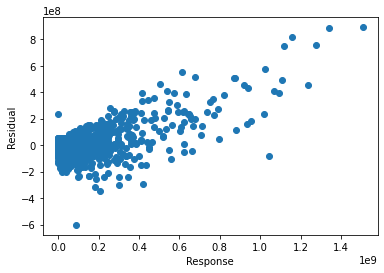

In [39]:
lasso_model = LassoCV(normalize=True, cv=10)
lasso_pred = fit_predict(lasso_model, X_train, X_test, y_train, y_test)
visualize_resids(lasso_pred, y_test)

104215217.80108894


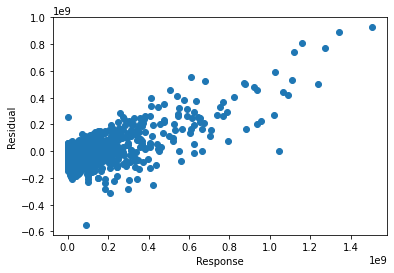

In [40]:
ridge_model = RidgeCV(normalize=True, cv=10)
ridge_pred = fit_predict(ridge_model, X_train, X_test, y_train, y_test)
visualize_resids(ridge_pred, y_test)

103105900.88795343


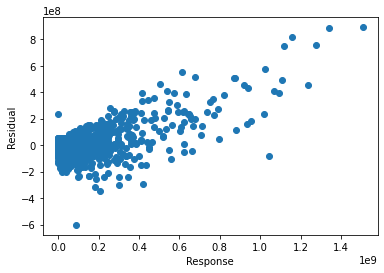

In [41]:
EN_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], normalize=True, cv=10)
EN_pred = fit_predict(EN_model, X_train, X_test, y_train, y_test)
visualize_resids(EN_pred, y_test)

In [42]:
max_feats = range(1, len(X.columns) + 1)
scores = []
for m in max_feats: 
    print(m)
    rf_reduced_cv = RandomForestRegressor(max_features=m)
    score = cross_val_score(rf_reduced_cv, X, y, scoring="neg_mean_squared_error", cv=5)
    scores.append(score.mean())   

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135


In [43]:
m = max_feats[scores.index(max(scores))]
rf = RandomForestRegressor(max_features=m)
rf_pred = fit_predict(rf, X_train, X_test, y_train, y_test)

95574957.66160837


# Model with People 

## Lasso

In [90]:
X = df_dummies.drop(["revenue", "vote_average"], axis=1)
y = df_dummies["revenue"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2)

105407165.5011167


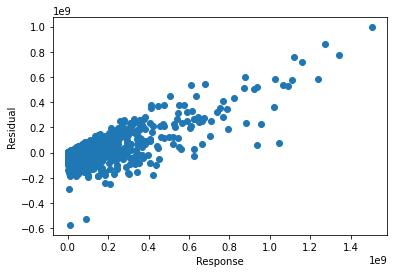

In [45]:
lasso_model = LassoCV(normalize=True, cv=10)
lasso_pred = fit_predict(lasso_model, X_train, X_test, y_train, y_test)
visualize_resids(lasso_pred, y_test)

## Ridge

119514260.03451802


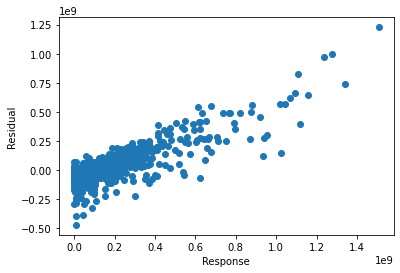

In [46]:
ridge_model = RidgeCV(normalize=True, cv=10)
ridge_pred = fit_predict(ridge_model, X_train, X_test, y_train, y_test)
visualize_resids(ridge_pred, y_test)

In [47]:
ridge_resids = pd.DataFrame({"rev":y_test, "pred":ridge_pred})
ridge_resids_50 = ridge_resids[ridge_resids["rev"] <= ridge_resids["rev"].quantile(.5)]
np.sqrt(np.mean((ridge_resids_50["rev"] - ridge_resids_50["pred"])**2))

72088238.2469439

# Elastic Net

105407165.5011167


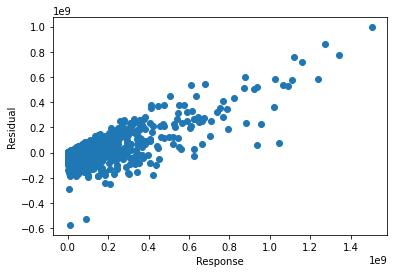

In [48]:
EN_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], normalize=True, cv=10)
EN_pred = fit_predict(EN_model, X_train, X_test, y_train, y_test)
visualize_resids(EN_pred, y_test)

In [49]:
EN_resids = pd.DataFrame({"rev":y_test, "pred":EN_pred})
EN_resids_90 = EN_resids[EN_resids["rev"] <= EN_resids["rev"].quantile(.2)]
np.sqrt(np.mean((EN_resids_90["rev"] - EN_resids_90["pred"])**2))

29704311.159036607

# Random Forest

In [93]:
max_feats = (np.arange(.1, 1.1, .1) * X.shape[1]).astype(np.int64)
scores = []
for m in max_feats: 
    print(m)
    rf_reduced_cv = RandomForestRegressor(max_features=m, n_jobs=-1)
    score = cross_val_score(rf_reduced_cv, X, y, scoring="neg_mean_squared_error", cv=5)
    scores.append(score.mean()) 

1862
3724
5586
7448
9310
11172
13034
14896
16758
18620


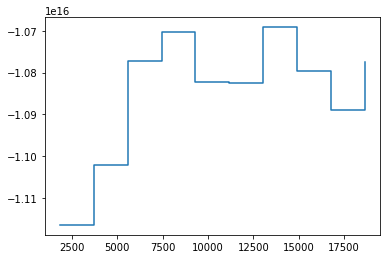

In [94]:
plt.plot(max_feats, scores, drawstyle="steps-post")

In [100]:
final_rf = RandomForestRegressor(max_features=len(X.columns)//3, n_jobs=-1)
final_rf_pred = fit_predict(final_rf, X_train, X_test, y_train, y_test)

93345079.20137572


In [101]:
feature_importance = pd.DataFrame({"feature" : X.columns, "importance" : final_rf.feature_importances_})
feature_importance = feature_importance.sort_values(by="importance", ascending=False).reset_index()
feature_importance.head(15)

,index,feature,importance
0,0,budget,0.389189
1,1,runtime,0.051395
2,40,is_franchise_True,0.047859
3,39,is_franchise_False,0.036782
4,15412,Screenwriter_James Cameron,0.015074
5,17535,keyword_culture clash,0.012943
6,3329,actor_1_Sam Worthington,0.010199
7,12441,Producer_Bryan Burk,0.007232
8,644,production_company_Ingenious Film Partners,0.006656
9,4974,actor_2_John Boyega,0.005991


In [107]:
revenue_predictions = pd.DataFrame()
revenue_predictions["actual"] = y_test
revenue_predictions["predicted"] = final_rf_pred
revenue_predictions.to_csv("movie_data/revenue_model.csv")

# Movie Ratings

In [58]:
y_ratings = df_dummies["vote_average"]
X_train, X_test, y_rating_train, y_rating_test = train_test_split(
    X, y_ratings, test_size=0.3, random_state=2)

## Lasso

0.7506336770137917


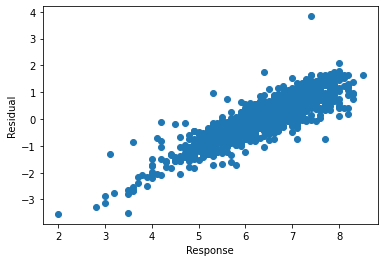

In [59]:
lasso_model = LassoCV(normalize=True, cv=10)
lasso_pred = fit_predict(lasso_model, X_train, X_test, y_rating_train, y_rating_test)
visualize_resids(lasso_pred, y_rating_test)

## Ridge

0.7681271071877057


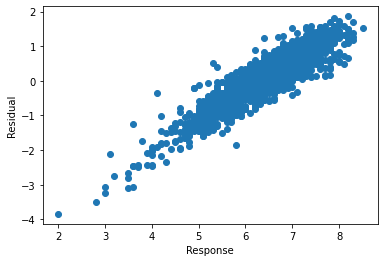

In [65]:
ridge_model = RidgeCV(normalize=True, cv=10)
ridge_pred = fit_predict(ridge_model, X_train, X_test, y_rating_train, y_rating_test)
visualize_resids(ridge_pred, y_rating_test)

## Random Forest

In [75]:
max_feats = (np.arange(.1, 1.1, .1) * X.shape[1]).astype(np.int64)
scores = []
for m in max_feats: 
    print(m)
    rf_reduced_cv = RandomForestRegressor(max_features=m, n_jobs=-1)
    score = cross_val_score(rf_reduced_cv, X, y_ratings, scoring="neg_mean_squared_error", cv=5)
    scores.append(score.mean()) 

1862
3724
5586
7448
9310
11172
13034
14896
16758
18620


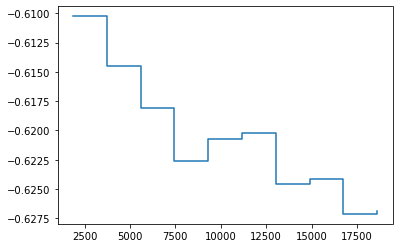

In [76]:
plt.plot(max_feats, scores, drawstyle="steps-post")

In [78]:
best_m = max_feats[scores.index(max(scores))]
best_m

1862

In [79]:
max_feats = (np.arange(.01, 0.11, .01) * X.shape[1]).astype(np.int64)
scores = []
for m in max_feats: 
    print(m)
    rf_reduced_cv = RandomForestRegressor(max_features=m, n_jobs=-1)
    score = cross_val_score(rf_reduced_cv, X, y_ratings, scoring="neg_mean_squared_error", cv=5)
    scores.append(score.mean()) 

186
372
558
744
931
1117
1303
1489
1675
1861


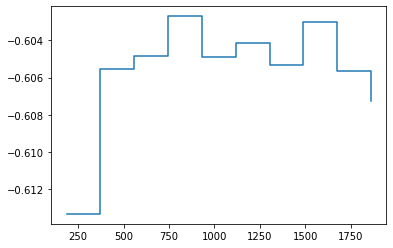

In [85]:
plt.plot(max_feats, scores, drawstyle="steps-post")

In [86]:
m = max_feats[scores.index(max(scores))]

In [84]:
rf_ratings_cv = RandomForestRegressor(max_features= n_jobs=-1)
rf_ratings_cv.fit(X_train, y_rating_train)
rf_ratings_pred = rf_ratings_cv.predict(X_test)
print(np.sqrt(mean_squared_error(y_rating_test, rf_ratings_pred)))

0.7284383273791075


(array([  4.,   3.,   9., 132., 339., 383., 357., 237.,  86.,  10.]),
 array([4.659 , 4.9501, 5.2412, 5.5323, 5.8234, 6.1145, 6.4056, 6.6967,
        6.9878, 7.2789, 7.57  ]),
 <a list of 10 Patch objects>)

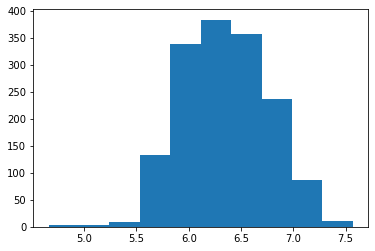

In [87]:
plt.hist(rf_ratings_pred)

(array([  1.,   5.,  12.,  24., 122., 259., 486., 389., 217.,  45.]),
 array([2.  , 2.65, 3.3 , 3.95, 4.6 , 5.25, 5.9 , 6.55, 7.2 , 7.85, 8.5 ]),
 <a list of 10 Patch objects>)

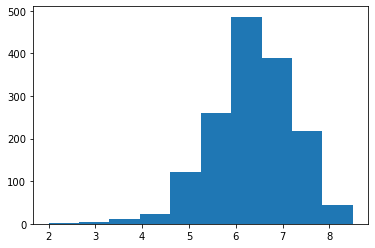

In [88]:
plt.hist(y_rating_test)

(array([  1.,   5.,   7.,  17.,  85., 230., 469., 490., 209.,  47.]),
 array([-4.016 , -3.4321, -2.8482, -2.2643, -1.6804, -1.0965, -0.5126,
         0.0713,  0.6552,  1.2391,  1.823 ]),
 <a list of 10 Patch objects>)

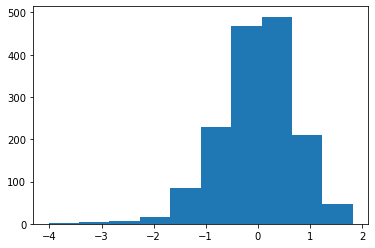

In [89]:
plt.hist(y_rating_test - rf_ratings_pred)

In [74]:
feature_importance = pd.DataFrame()
feature_importance["feature"] = X.columns
feature_importance["importance"] = rf_ratings_cv.feature_importances_
feature_importance.sort_values(by="importance", ascending=False).iloc[:25]

,feature,importance
1,runtime,0.098330
0,budget,0.043838
47,genre_Drama,0.017661
52,genre_Horror,0.009937
13640,Producer_None,0.009149
41,genre_Action,0.007932
9,original_language_en,0.007562
44,genre_Comedy,0.006680
17227,keyword_None,0.006404
1474,country_United Kingdom,0.003838


In [106]:
rating_predictions = pd.DataFrame()
rating_predictions["actual"] = y_rating_test
rating_predictions["predicted"] = rf_ratings_pred
rating_predictions.to_csv("movie_data/rating_model.csv")

# Case Study

In [156]:
def get_movie_prediction(revenue_model, rating_model, movie_index, X):
    movie_row = X.loc[movie_index]
    actual_revenue = movie_row["revenue"].iloc[0]
    actual_rating = movie_row["vote_average"].iloc[0]
    pred_rev = revenue_model.predict(movie_row.drop(["revenue", "vote_average"], axis=1))[0].astype(float)
    pred_rating = rating_model.predict(movie_row.drop(["revenue", "vote_average"], axis=1))[0].astype(float)
    
    print("Actual Revenue: \t", actual_revenue)
    print("Predicted Revenue: \t", pred_rev)
    print()
    print("Actual Rating: \t\t", actual_rating)
    print("Predicted Rating: \t", pred_rating)

### Get Out

lower budget, not huge blockbuster actors or director

In [157]:
get_movie_prediction(final_rf, rf_ratings_cv, get_out_row, df_dummies)

Actual Revenue: 	 252434250.0
Predicted Revenue: 	 162096225.51

Actual Rating: 		 7.2
Predicted Rating: 	 6.912000000000003


### Avatar

highest grossing

In [158]:
get_movie_prediction(final_rf, rf_ratings_cv, avatar_row, df_dummies)

Actual Revenue: 	 2787965087.0
Predicted Revenue: 	 2171854541.44

Actual Rating: 		 7.2
Predicted Rating: 	 7.056000000000008


### The Good Dinosaur
known faliure from studio with consistent success

In [163]:
get_movie_prediction(final_rf, rf_ratings_cv, good_dino_row, df_dummies)

Actual Revenue: 	 331926147.0
Predicted Revenue: 	 413615799.15

Actual Rating: 		 6.6
Predicted Rating: 	 6.276999999999999


### Nightcrawler

Less than average revenue, chosen with rng

In [171]:
get_movie_prediction(final_rf, rf_ratings_cv, nightcrawler_row, df_dummies)

Actual Revenue: 	 38697217.0
Predicted Revenue: 	 32918238.05

Actual Rating: 		 7.6
Predicted Rating: 	 7.376000000000009


### Mars Needs Moms

Famous flop

In [168]:
get_movie_prediction(final_rf, rf_ratings_cv, mars_row, df_dummies)

Actual Revenue: 	 38992758.0
Predicted Revenue: 	 99453628.21

Actual Rating: 		 5.6
Predicted Rating: 	 5.7400000000000055
